## Importing the data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df=pd.read_csv('input/fashion-mnist_train.csv',sep=',')

In [3]:
fashion_test_df=pd.read_csv('input/fashion-mnist_test.csv',sep=',')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_train_df.shape

(60000, 785)

In [11]:
fashion_test_df.shape

(10000, 785)

In [12]:
training=np.array(fashion_train_df,dtype='float32')

In [13]:
testing=np.array(fashion_test_df,dtype='float32')

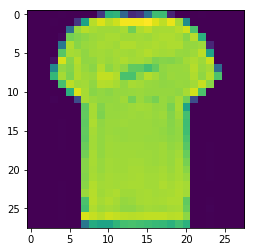

In [14]:
plt.imshow(training[10,1:].reshape(28,28))

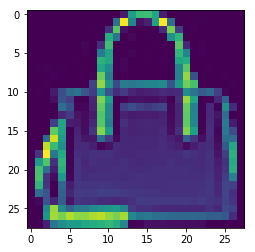

In [15]:
plt.imshow(training[11,1:].reshape(28,28))

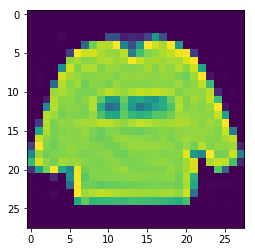

In [17]:
plt.imshow(training[0,1:].reshape(28,28))

8.0

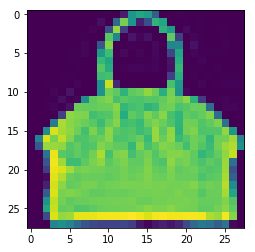

In [20]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

In [ ]:
# 10 classes decoding is as follows
# 0:Tshirt/top
# 1:Trouser
# 2:Pullover
# 3:Dress
# 4:Coat
# 5:Sandal
# 6:Shirt
# 7:Sneakers
# 8:Bag
# 9:AnkleBoot


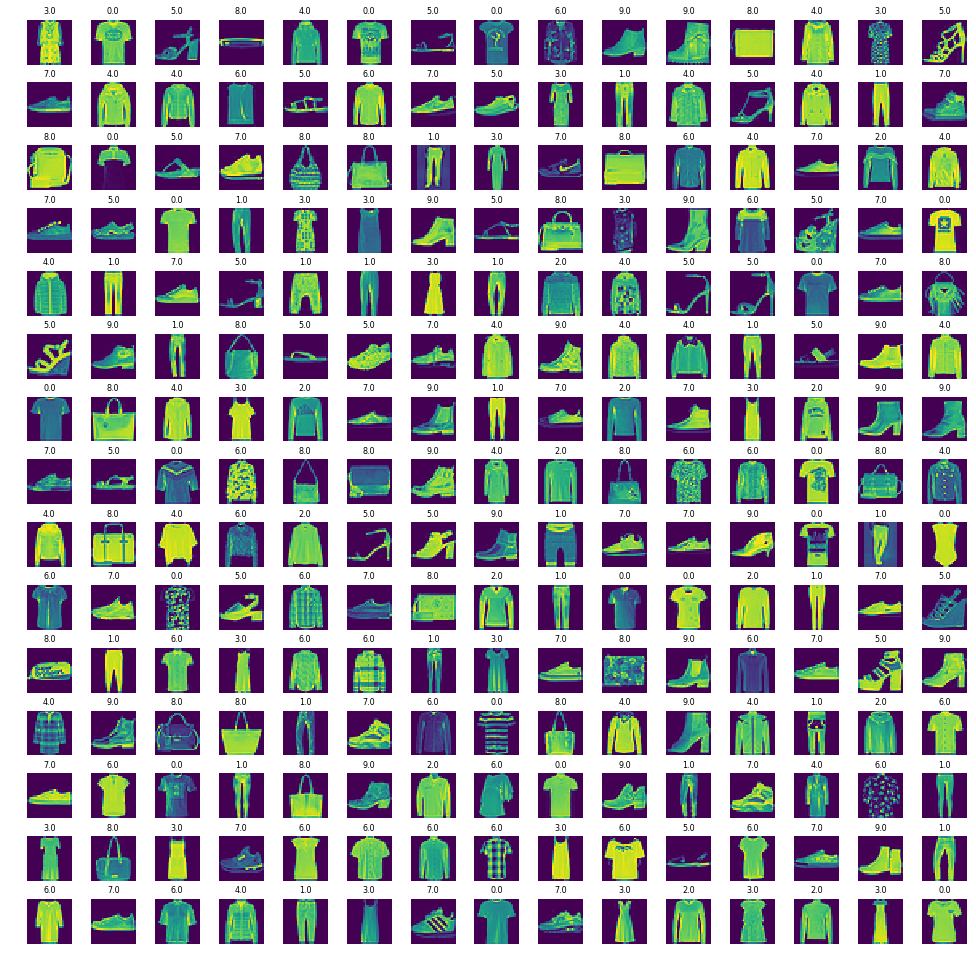

In [21]:
# Matrix view of the data set
W_grid=15
L_grid=15

fig,axes=plt.subplots(L_grid,W_grid,figsize=(17,17))

axes=axes.ravel()

n_training=len(training)

for i in np.arange(0,W_grid*L_grid):
    #Select the random no
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)   

## Training the model

In [55]:
X_train=training[:,1:]/255  # Normalization Also
y_train=training[:,0]

In [56]:
X_test=testing[:,1:]/255   # Normalization Also
y_test=testing[:,0]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [58]:
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [59]:
X_train.shape

(48000, 28, 28, 1)

In [60]:
X_test.shape

(10000, 28, 28, 1)

In [61]:
X_validate.shape

(12000, 28, 28, 1)

In [71]:
import keras

Using TensorFlow backend.


In [75]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [76]:
cnn_model=Sequential() # Building the sequential model

In [78]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))# Adding the convolutional layer

C:\Users\alokt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [79]:
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling

In [80]:
cnn_model.add(Flatten()) # Adding the falltening layer

In [81]:
cnn_model.add(Dense(output_dim=32,activation='relu'))

C:\Users\alokt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [82]:
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))

C:\Users\alokt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [83]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [84]:
epochs=50

In [85]:
cnn_model.fit(X_train,y_train,
             batch_size=512,
             nb_epoch=epochs,
             verbose=1,
             validation_data=(X_validate,y_validate))

C:\Users\alokt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 17s 350us/step - loss: 0.8346 - accuracy: 0.7396 - val_loss: 0.5075 - val_accuracy: 0.8195
Epoch 2/50
48000/48000 [==============================] - 15s 314us/step - loss: 0.4612 - accuracy: 0.8388 - val_loss: 0.4469 - val_accuracy: 0.8372
Epoch 3/50
48000/48000 [==============================] - 15s 321us/step - loss: 0.4042 - accuracy: 0.8601 - val_loss: 0.3902 - val_accuracy: 0.8656
Epoch 4/50
48000/48000 [==============================] - 15s 319us/step - loss: 0.3722 - accuracy: 0.8718 - val_loss: 0.3589 - val_accuracy: 0.8780
Epoch 5/50
48000/48000 [==============================] - 15s 310us/step - loss: 0.3527 - accuracy: 0.8789 - val_loss: 0.3661 - val_accuracy: 0.8749
Epoch 6/50
48000/48000 [==============================] - 15s 321us/step - loss: 0.3398 - accuracy: 0.8831 - v

## Evaluating the model

In [90]:
eval=cnn_model.evaluate(X_test,y_test)
print('accuracy : {:.3f}'.format(eval[1]))

10000/10000 [==============================] - 1s 96us/step
accuracy : 0.911


In [93]:
predict_classes=cnn_model.predict_classes(X_test)

In [94]:
predict_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

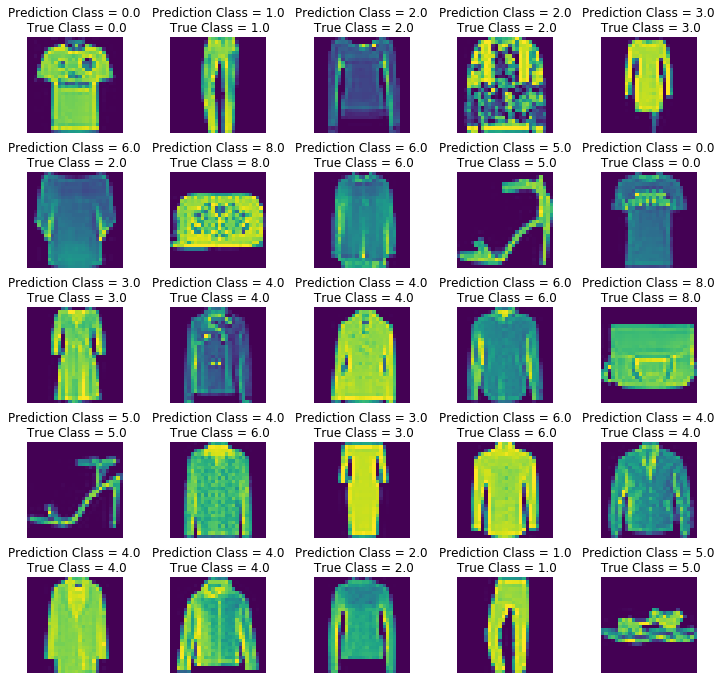

In [100]:
L=5
W=5

fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predict_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
cm=confusion_matrix(y_test,predict_classes)

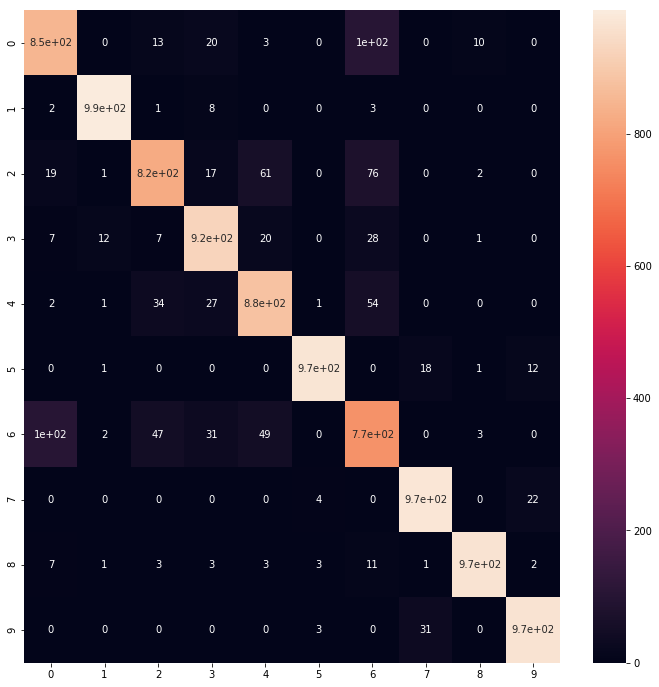

In [105]:
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True)

In [106]:
from sklearn.metrics import classification_report

num=10

target_names=["Class {}".format(i) for i in range (num)]

In [107]:
print(classification_report(y_test,predict_classes,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.85      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.89      0.82      0.85      1000
     Class 3       0.90      0.93      0.91      1000
     Class 4       0.87      0.88      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.74      0.77      0.75      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.97      0.97      1000
     Class 9       0.96      0.97      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

